# Paimon Classifier
credit: https://www.kaggle.com/code/totoe94/anime-classification/notebook

In [ ]:
# Import Libraries
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
import numpy as np
import cv2
import glob
import random

from IPython.display import Image
import matplotlib.pyplot as plt

In [ ]:
TargetSize = (224,224) 
def prepare_image(filepath):
    img = cv2.imread(filepath)
    img_resized = cv2.resize(img, TargetSize, interpolation=cv2.INTER_CUBIC)
    img_result  = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    return img_result

# prepare data

In [ ]:
dirList = glob.glob('training'+'/*') # list of all directories in dataPath
dirList.sort() # sorted in alphabetical order
print(dirList)

['training/notpaimon', 'training/paimon']


In [ ]:
Y_data = []
for i in range(len(dirList)):
    fileList = glob.glob(dirList[i]+'/*')
    [Y_data.append(i) for file in fileList]
print(Y_data)

[0, 0, 0, 0, 1, 1, 1, 1, 1]


In [ ]:
X_data = []
for i in range(len(dirList)):
    fileList = glob.glob(dirList[i]+'/*')
    [X_data.append(prepare_image(file)) for file in fileList]
X_data = np.asarray(X_data)
print(X_data.shape)

(9, 224, 224, 3)


In [ ]:
from sklearn.utils import shuffle
X_data, Y_data = shuffle(X_data, Y_data, random_state=0)
Y_data

[0, 0, 0, 1, 1, 0, 1, 1, 1]

3


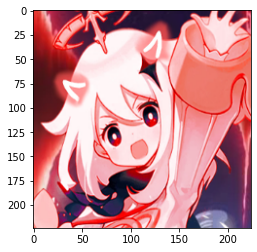

In [ ]:
testNum = random.randint(0,len(X_data))
print(testNum)
plt.imshow(X_data[testNum])

In [ ]:
num_classes = len(dirList) 
labels = [dir.replace('training'+"/", "") for dir in dirList]
print(labels)

['notpaimon', 'paimon']


In [ ]:
equilibre = []
[equilibre.append(Y_data.count(i)) for i in range(len(dirList))]
print(equilibre)

[4, 5]


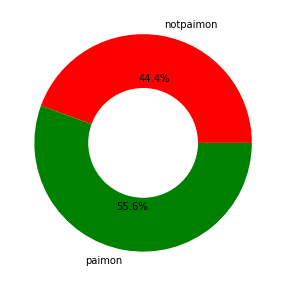

In [ ]:
# plot the circle of value counts in dataset
plt.figure(figsize=(5,5))
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(equilibre, labels=labels, colors=['red','green','blue'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# Normalize Data

In [ ]:
# Data Normalisation
X_train = X_data / 255.0
print(X_train.shape)

(9, 224, 224, 3)


In [ ]:
# One-hot encoding
Y_train = to_categorical(Y_data)
print(Y_train.shape)

(9, 2)


In [ ]:
input_shape = (224, 224, 3)

In [ ]:
# use MobieNet V2 as base model
base_model=MobileNetV2(input_shape=(224,224,3),weights='imagenet',include_top=False) 

# add Fully-Connected Layers to Model
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) # FC layer 1
x=Dense(64,activation='relu')(x)   # FC layer 2
preds=Dense(num_classes,activation='softmax')(x) #final layer with softmax activation

model=Model(inputs=base_model.input,outputs=preds)
# model.summary()

In [ ]:
# set extra layers to trainable 
for layer in model.layers[:155]:
    layer.trainable=False
for layer in model.layers[155:]:
    layer.trainable=True

In [ ]:
# Compile Model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train Model (target is loss <0.01)
batch_size= 16
num_epochs = 10
history = model.fit(X_train,Y_train,batch_size=batch_size,epochs=num_epochs)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.9907 - accuracy: 0.4444
Epoch 2/10
1/1 [==============================] - 0s 263ms/step - loss: 1.8352 - accuracy: 0.5556
Epoch 3/10
1/1 [==============================] - 0s 267ms/step - loss: 0.4541 - accuracy: 0.6667
Epoch 4/10
1/1 [==============================] - 0s 271ms/step - loss: 0.2052 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 251ms/step - loss: 0.2461 - accuracy: 0.8889
Epoch 6/10
1/1 [==============================] - 0s 268ms/step - loss: 0.1077 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 267ms/step - loss: 0.0476 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 270ms/step - loss: 0.0199 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 258ms/step - loss: 0.0096 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 263ms/step - loss: 0.0056 - accuracy: 1.0000


In [ ]:
def classify_worms(imageFile):
    testData = prepare_image(imageFile).reshape(1,224,224,3)
    testData = testData / 255.0
    predictions = model.predict(testData)
#    print(predictions[0])
    maxindex = int(np.argmax(predictions))
    print(predictions[0][maxindex],labels[maxindex])
    return labels[maxindex]

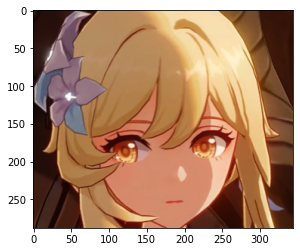

0.9856089 notpaimon


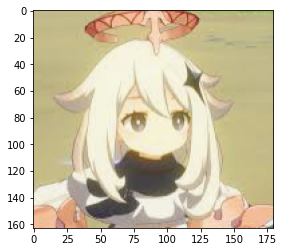

0.8295972 notpaimon


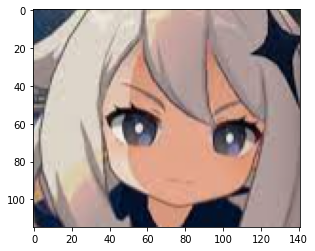

0.9471651 paimon


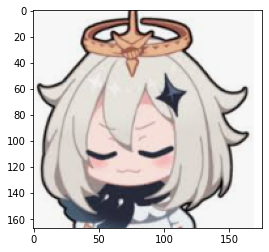

0.52910495 paimon


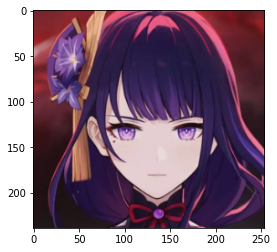

0.9996177 notpaimon


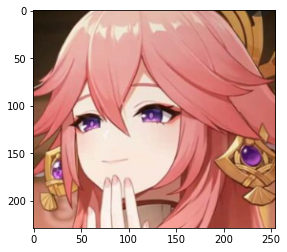

0.9990403 notpaimon


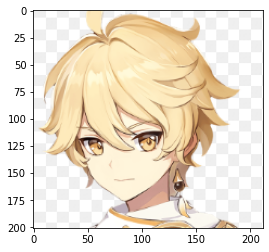

0.99101186 notpaimon


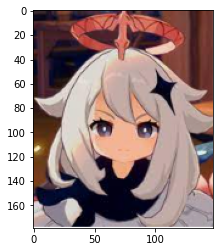

0.94900113 paimon


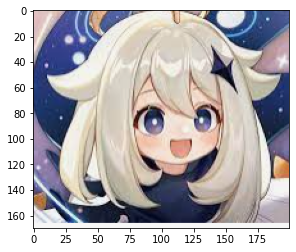

0.9465162 paimon


In [ ]:
test_path = 'test'

for i in os.listdir(test_path):
    imageFile=test_path + '//' + i
    img = image.load_img(imageFile)
    plt.imshow(img)
    plt.show()
    classify_worms(imageFile)